In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

# Отбор признаков

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [7]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [8]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<Axes: xlabel='engine-type', ylabel='Count'>

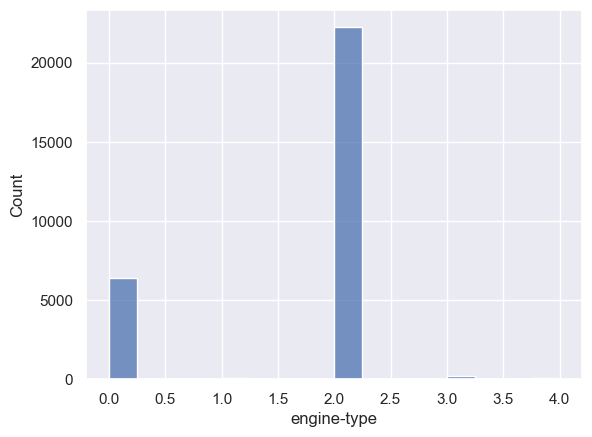

In [9]:
sns.histplot(data=train_X, x='engine-type')

sns.pairplot(train_X[numerical]);

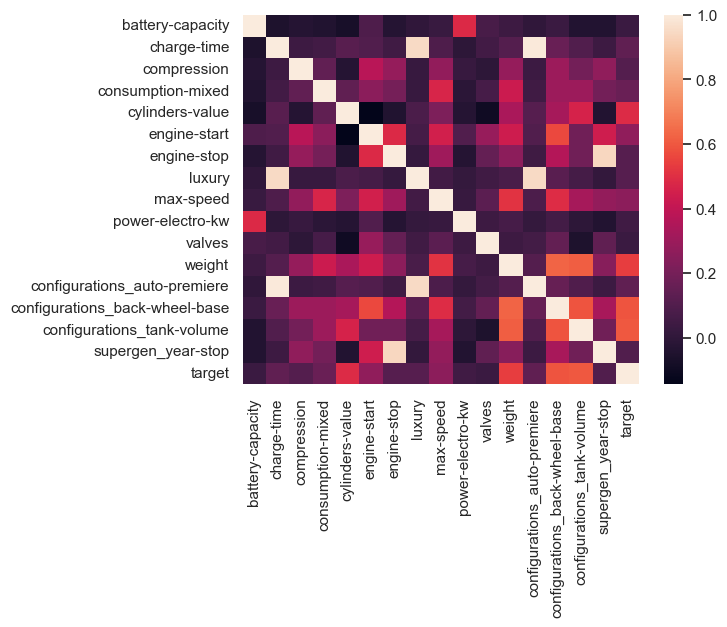

In [11]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [12]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.11003752360955588 p-value: 9.725646829241755e-79


In [13]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667099646 p-value: 5.6105473636110596e-05


## F-test

In [15]:
from sklearn.feature_selection import f_regression, SelectKBest

In [16]:
f_statistic, p_values = f_regression(train_X, train_y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 0.00000000e+000])

In [18]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  1.6000e+01,
         0.0000e+00,  2.4300e+03],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  2.3000e+01,
         0.0000e+00,  2.4400e+03],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  1.0000e+01,
         0.0000e+00,  2.6850e+03],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ...,  2.6000e+01,
         0.0000e+00,  2.6700e+03],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.6000e+01,
         0.0000e+00,  2.5000e+03],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  3.5000e+01,
         0.0000e+00,  2.8800e+03]])

In [19]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial', 'target'],
      dtype=object)

In [20]:
# Выбор первых 5 признаков для сокращенного набора данных
train_cut_X = train_X.iloc[:, :5]
test_cut_X = test_X.iloc[:, :5]

## Значения Шепли

In [22]:
reg = LinearRegression().fit(train_cut_X, train_y)

In [23]:
explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

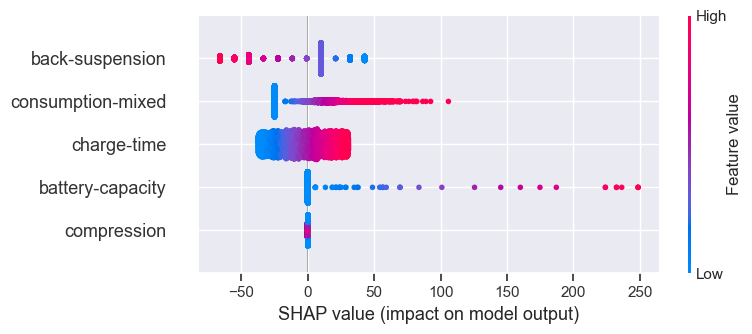

In [24]:
# Визуализация значимости признаков методом Шепли
shap.summary_plot(shap_values, test_cut_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [26]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

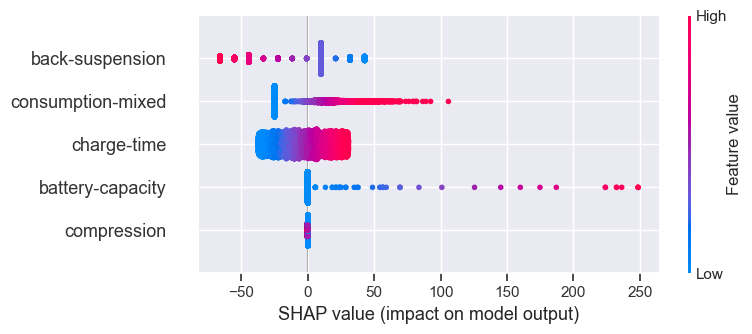

In [27]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [30]:
# Метод отбора признаков по важности Шепли
feature_importance = np.abs(shap_values.values).mean(axis=0)  # Средняя абсолютная важность признаков
feature_names = train_cut_X.columns

In [31]:
# Создание DataFrame с важностью признаков
shap_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by="Importance", ascending=False)
shap_feature_importance

,Feature,Importance
0,back-suspension,25.322809
4,consumption-mixed,21.286720
2,charge-time,16.920433
1,battery-capacity,0.271452
3,compression,0.049537


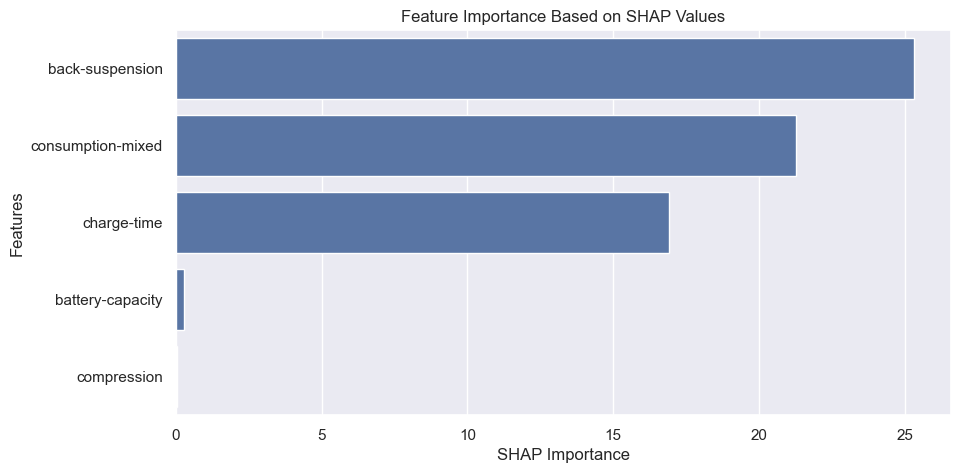

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(y=shap_feature_importance["Feature"], x=shap_feature_importance["Importance"])
plt.xlabel("SHAP Importance")
plt.ylabel("Features")
plt.title("Feature Importance Based on SHAP Values")
plt.show()

## Пермутационная важность

### Задание
Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(train_X, train_y)

In [36]:
perm_importance = permutation_importance(reg, test_X, test_y, n_repeats=10, random_state=42)

In [37]:
feature_importance = pd.DataFrame({
    'Feature': test_X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values(by="Importance", ascending=False)
feature_importance

,Feature,Importance,Std
6,cylinders-value,0.362611,6.991000e-03
24,configurations_tank-volume,0.102472,1.816654e-03
23,configurations_seats,0.095987,1.997329e-03
10,engine-type,0.051970,2.109153e-03
8,engine-start,0.047532,2.051077e-03
19,configurations_auto-premiere,0.030071,9.450475e-04
2,charge-time,0.029485,9.663637e-04
11,gear-type,0.020322,1.127951e-03
3,compression,0.019024,1.196352e-03
18,weight,0.014665,1.181692e-03


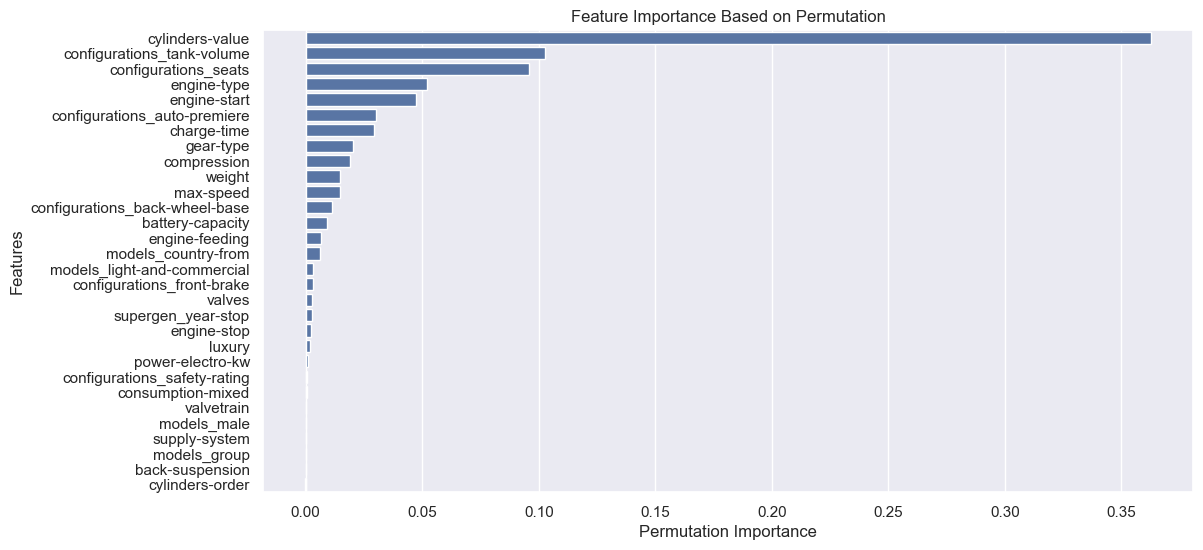

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(y=feature_importance["Feature"], x=feature_importance["Importance"])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance Based on Permutation")
plt.show()